In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
housing_raw = pd.read_csv(
    '/Users/puchku-home/Study/Python Libs/Data Viz with Matplotlib & Seaborn/Data/housing_data.csv',
    parse_dates =["period_begin", "period_end"],
    dtype={"total_homes_sold": "Int32", "region_name": "category"})

In [7]:
ca_housing = housing_raw.loc[
    (housing_raw["region_name"].str.contains("CA"))
].assign(region_name = housing_raw["region_name"].str[0:-11])

In [9]:
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


In [33]:
ca_housing_pivot = (
    ca_housing
    .pivot_table(index="period_begin",
                 columns = "region_name",
                 values = "inventory")
    .assign(CA_average = lambda x: x.mean (axis=1))
    .loc[:, ["Los Angeles", "San Diego", "San Francisco", "CA_average" ]]
)
ca_housing_pivot.head()

region_name,Los Angeles,San Diego,San Francisco,CA_average
period_begin,,,,
2017-01-02,15492.0,5468.0,626.0,1259.851852
2017-01-09,15605.0,5493.0,652.0,1268.888889
2017-01-16,15724.0,5520.0,673.0,1278.481481
2017-01-23,15834.0,5546.0,685.0,1287.129630
2017-01-30,15972.0,5581.0,697.0,1298.148148


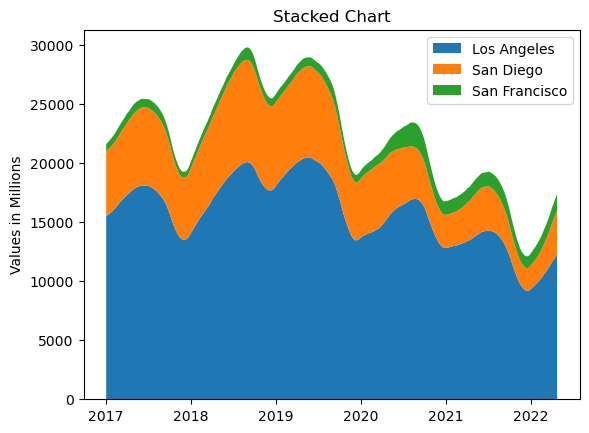

In [35]:
fig, ax = plt.subplots()

ax.stackplot(
    ca_housing_pivot.index,
    ca_housing_pivot["Los Angeles"],
    ca_housing_pivot["San Diego"],
    ca_housing_pivot["San Francisco"]
)

ax.set_title("Stacked Chart")
ax.set_ylabel("Values in Millions")

ax.legend(ca_housing_pivot.columns,bbox_to_anchor = (1,1))


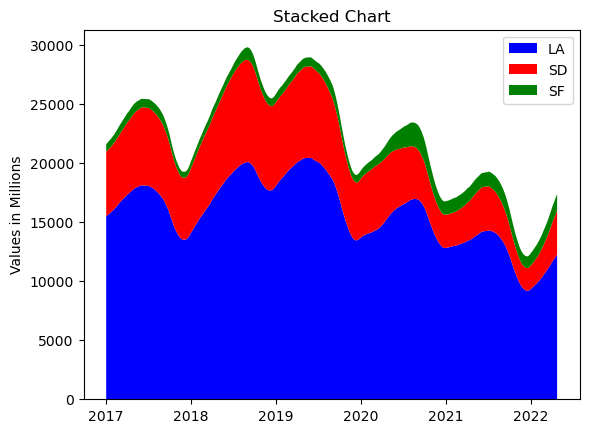

In [61]:
fig, ax = plt.subplots()


labels = ["LA","SD","SF"]

colors = ["blue","red","green"]

ax.stackplot(
    ca_housing_pivot.index,
    ca_housing_pivot["Los Angeles"],
    ca_housing_pivot["San Diego"],
    ca_housing_pivot["San Francisco"],
    labels = labels,
    colors = colors
)

ax.set_title("Stacked Chart")
ax.set_ylabel("Values in Millions")

ax.legend(bbox_to_anchor = (1,1))
